In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\Data\data Data-Science-Masterclass\DATA\hearing_test.csv')

In [5]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [7]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [9]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

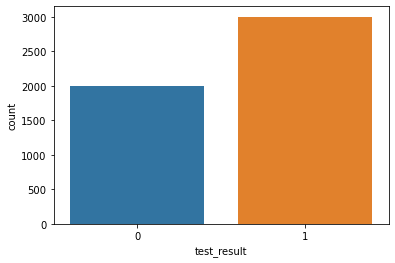

In [24]:
sns.countplot(data = df, x='test_result');

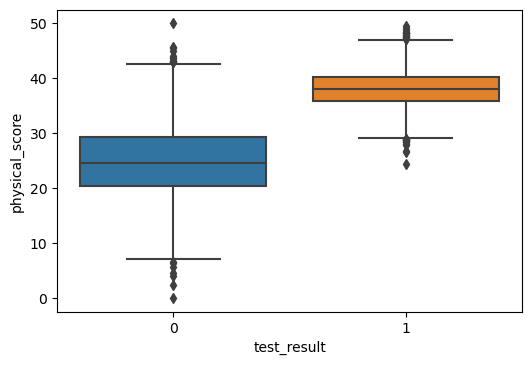

In [23]:
plt.figure(dpi=100)
sns.boxplot(x='test_result', y='physical_score',data = df);

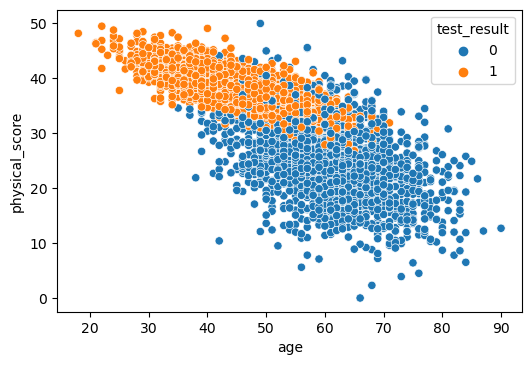

In [22]:
plt.figure(dpi=100)
sns.scatterplot(x='age', y='physical_score',hue='test_result', data=df);

<Figure size 600x400 with 0 Axes>

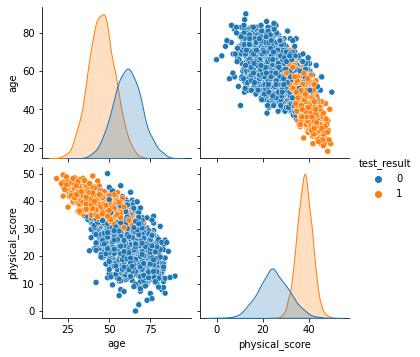

In [26]:
plt.figure(dpi=100)
sns.pairplot(data =df, hue='test_result');

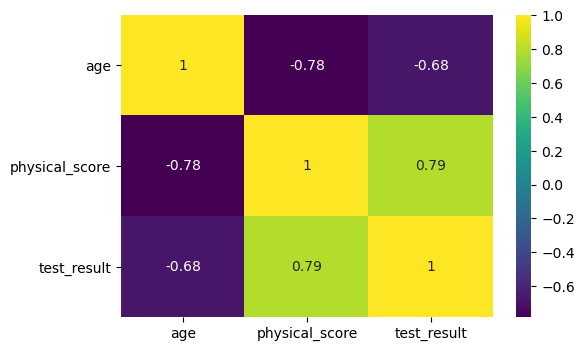

In [30]:
plt.figure(dpi=100)
sns.heatmap(df.corr(), annot= True, cmap= 'viridis');

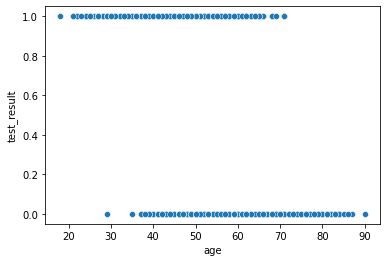

In [34]:
sns.scatterplot(x='age',y='test_result', data=df);

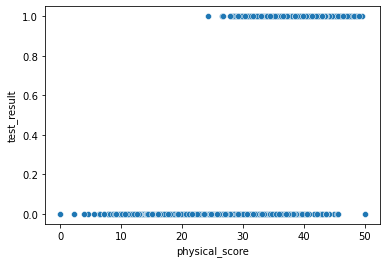

In [37]:
sns.scatterplot(x='physical_score', y='test_result', data=df);

In [38]:
from mpl_toolkits.mplot3d import Axes3D

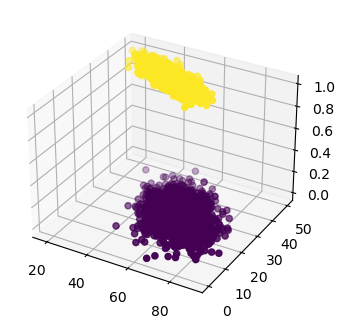

In [49]:
fig = plt.figure(dpi =100)
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c= df['test_result'])

In [50]:
X = df.drop('test_result', axis = 1)
y = df['test_result']

<b> train test split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.10, random_state= 101)

<b> Scaler data

In [54]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler= StandardScaler()

In [58]:
scaler.fit(X_train)

StandardScaler()

In [59]:
X_train_scaler = scaler.transform(X_train)

In [60]:
X_test_scaler = scaler.transform(X_test)

<b> Model Linear Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
log_model = LogisticRegression()

In [65]:
log_model.fit(X_train_scaler, y_train)

LogisticRegression()

In [69]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

<b> predict_proba

In [80]:
y_pred = log_model.predict_proba(X_test_scaler)

In [81]:
y_pred

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

# Precision and Recall

In [83]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [84]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [86]:
log_model.predict([[70,10]])[0]

0

<b> accuracy_score, confusion_matrix, classification_report

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [89]:
y_test

1718    1
2511    1
345     0
2521    1
54      0
       ..
4770    1
188     1
3335    0
4583    0
3208    0
Name: test_result, Length: 500, dtype: int64

In [90]:
y_pred = log_model.predict(X_test_scaler)

In [91]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

# confusion_matrix

In [100]:
matrix =confusion_matrix(y_test, y_pred)
matrix

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [96]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


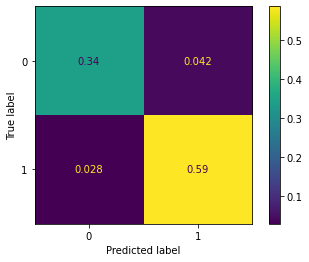

In [98]:
plot_confusion_matrix(log_model, X_test_scaler, y_test, normalize ='all')

In [102]:
tn, fp,fn,tp = matrix.ravel()

print(f'TN :{tn}')
print(f'FP :{fp}')
print(f'FN :{fn}')
print(f'TP :{tp}')

TN :172
FP :21
FN :14
TP :293


# classification report

In [155]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



# Accuracy score

$ Accuracy = \frac{TP + TN}{TP +TN+FP+FN} = \frac{correct}{total}$

In [103]:
correct = tp+tn
total = tp+tn+fp+fn

In [104]:
acc = correct/total
acc

0.93

<b> modul sklearn

In [92]:
ACC = accuracy_score(y_test, y_pred)
ACC

0.93

# precission_score

In [117]:
from sklearn.metrics import precision_score, recall_score

$Precission = \frac{TP}{TP+FP}$

In [113]:
TP = tp
TPFP = tp+fp

In [123]:
precission = TP/TPFP
precission

0.9331210191082803

<b> modul sklearn

In [116]:
precision_score(y_test, y_pred)

0.9331210191082803

# Recall_score

$ Recall = \frac{TP}{TP + FN}$

In [118]:
TP = tp
TPFN = tp+fn

In [120]:
recall = TP/TPFN
recall

0.9543973941368078

<B> modul sklearn

In [122]:
recall =recall_score(y_test, y_pred)
recall

0.9543973941368078

## plot_precision_recall_curve, plot_roc_curve

In [139]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


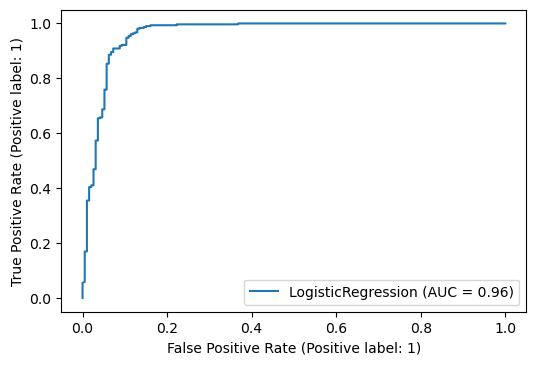

In [153]:
fig, ax = plt.subplots(figsize =(6,4), dpi = 100)
plot_roc_curve(log_model, X_test_scaler, y_test, ax= ax)
#plt.plot([0,1],[0,1], '--', 'r')

<b> plot_precision_recall_curve

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


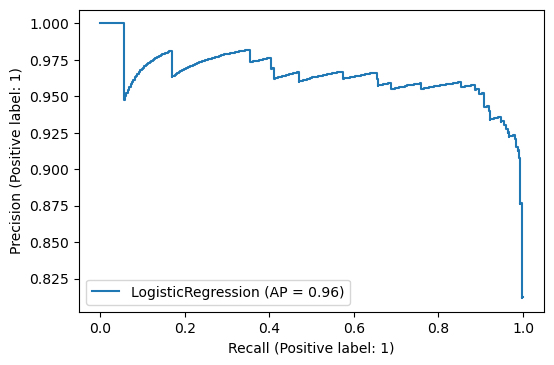

In [154]:
fig, ax  = plt.subplots(figsize = (6, 4) , dpi = 100)
plot_precision_recall_curve(log_model, X_test_scaler, y_test, ax=ax)